# Data Exploration

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Load the dataframe

In [22]:
df = pd.read_csv('draftdata.csv')
df['College'] = df.College.fillna('No College')

#### Normalizing the data by only including the first 2 rounds of the draft (as has been the case since 1989)

In [23]:
df = df.loc[df.Pk <= 60]

#### Adding a ranking feature for each draft to rank players by different performance metrics

In [24]:
list_rankings = ['WS','BPM','VORP']
for val in list_rankings:
	head = val + '_rank'
	df[head] = df.groupby(by='Draft')[val].rank(ascending= False).astype('int')

#### Adding identifiers for lottery picks and players ranked in the top 50 by WinShares

In [25]:
df['Lottery'] = df['Pk'].apply(lambda x: True if x <= 14 else False)
df['Superstar'] = df['WS'].apply(lambda x: True if x > 120 else False)

#### Adding columns to rank picks and another field to classify draft success

In [26]:
col_list = ['WS_rank', 'BPM_rank', 'VORP_rank']
for item in col_list:
	df[item + '_return']= df['Pk'] - df[item]

In [27]:
df['over_under'] = df['WS_rank_return'].apply(lambda x: 'Overdrafted' if x < 0 else ('Underdrafted' if x > 0 else 'Even'))

In [28]:
df.columns

Index(['Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'MPG', 'PPG', 'RPG', 'APG', 'WS', 'WS/48', 'BPM',
       'VORP', 'Draft', 'WS_rank', 'BPM_rank', 'VORP_rank', 'Lottery',
       'Superstar', 'WS_rank_return', 'BPM_rank_return', 'VORP_rank_return',
       'over_under'],
      dtype='object')

#### Initial Data Exploration

In [29]:
df.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,Draft,WS_rank,BPM_rank,VORP_rank,Lottery,Superstar,WS_rank_return,BPM_rank_return,VORP_rank_return,over_under
0,1,GSW,Joe Barry Carroll,Purdue,10.0,705.0,22838.0,12455.0,5404.0,1264.0,...,1980,7,27,6,True,False,-6,-26,-5,Overdrafted
1,2,UTA,Darrell Griffith,Louisville,10.0,765.0,21403.0,12391.0,2519.0,1627.0,...,1980,14,34,14,True,False,-12,-32,-12,Overdrafted
2,3,BOS,Kevin McHale,Minnesota,13.0,971.0,30118.0,17335.0,7122.0,1670.0,...,1980,1,1,1,True,False,2,2,2,Underdrafted
3,4,CHI,Kelvin Ransey,Ohio State,6.0,474.0,11586.0,5380.0,901.0,2480.0,...,1980,15,29,15,True,False,-11,-25,-11,Overdrafted
4,5,DEN,James Ray,Jacksonville University,3.0,103.0,843.0,334.0,228.0,76.0,...,1980,56,51,55,True,False,-51,-46,-50,Overdrafted


In [30]:
df.describe()

,Pk,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,...,WS/48,BPM,VORP,Draft,WS_rank,BPM_rank,VORP_rank,WS_rank_return,BPM_rank_return,VORP_rank_return
count,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,...,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000
mean,29.640954,6.122087,352.667037,8663.519423,3691.464484,1540.868479,818.927303,0.363956,0.178777,0.577042,...,0.049758,-1.904273,4.799667,1995.016648,29.496115,29.455605,29.455605,0.144839,0.185350,0.185350
std,16.883714,5.348340,365.831275,10927.285134,5330.492738,2234.493789,1436.697106,0.180730,0.160041,0.298498,...,0.092909,4.030993,12.706152,9.055186,16.662380,16.793929,16.658322,15.661983,22.094719,20.061899
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.264000,-52.000000,-8.500000,1980.000000,1.000000,1.000000,1.000000,-57.000000,-53.000000,-57.000000
25%,15.000000,1.000000,23.000000,146.250000,46.250000,25.250000,7.000000,0.363250,0.000000,0.531250,...,0.000000,-3.500000,-0.300000,1987.000000,15.000000,16.000000,15.000000,-9.000000,-16.000000,-12.000000
50%,30.000000,5.000000,207.000000,3032.500000,1079.500000,482.000000,181.000000,0.431000,0.200000,0.700000,...,0.057000,-1.300000,0.000000,1995.000000,29.500000,29.000000,30.000000,0.000000,-1.000000,2.000000
75%,44.000000,11.000000,639.750000,14849.000000,5563.000000,2307.750000,987.750000,0.469000,0.332750,0.777750,...,0.094000,0.000000,4.200000,2003.000000,45.000000,44.000000,43.000000,9.000000,16.000000,14.000000
max,60.000000,22.000000,1541.000000,54852.000000,36928.000000,15091.000000,15806.000000,1.000000,1.000000,1.000000,...,1.442000,51.100000,133.700000,2010.000000,60.000000,60.000000,60.000000,54.000000,56.000000,56.000000


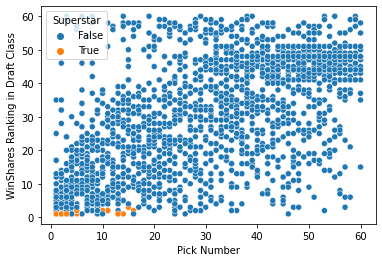

In [31]:
sns.scatterplot(x= 'Pk', y= 'WS_rank', data= df, hue= 'Superstar')
plt.xlabel('Pick Number')
plt.ylabel('WinShares Ranking in Draft Class')
plt.show()

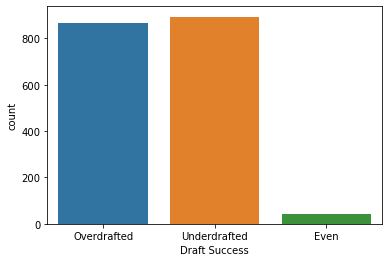

In [32]:
sns.countplot(x= 'over_under', data= df)
plt.xlabel('Draft Success')
plt.show()

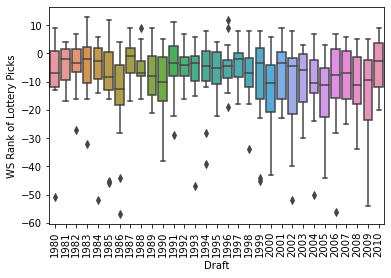

In [36]:
sns.boxplot(x= 'Draft',y= 'WS_rank_return', data= df.loc[df.Lottery==True])
plt.ylabel('WS Rank of Lottery Picks')
plt.xticks(rotation=90)
plt.show()


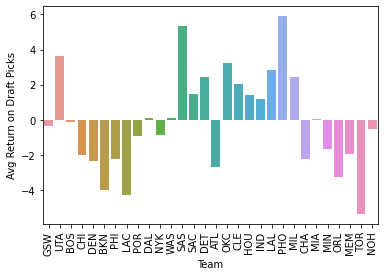

In [37]:
sns.barplot(x= 'Tm', y= 'WS_rank_return', data= df, ci= None)
plt.xlabel('Team')
plt.ylabel('Avg Return on Draft Picks')
plt.xticks(rotation=90)
plt.show()

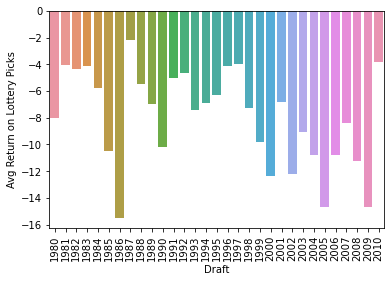

In [38]:
sns.barplot(x= 'Draft', y= 'WS_rank_return', data= df.loc[df.Lottery==True], ci= None)
plt.ylabel('Avg Return on Lottery Picks')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

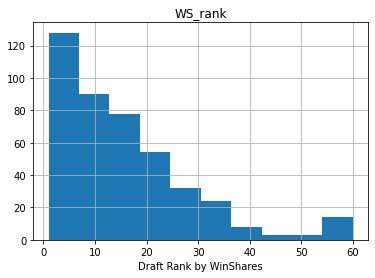

In [24]:
df.loc[df.Lottery==True].hist('WS_rank')
plt.xlabel('Draft Rank by WinShares')
plt.show

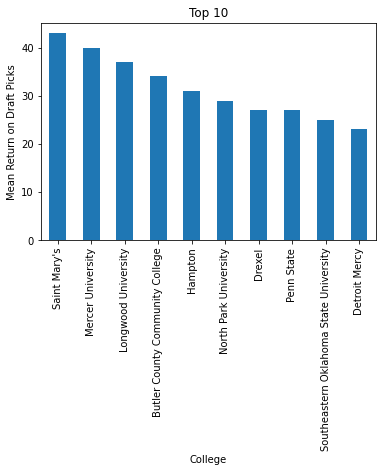

In [44]:
df.groupby('College')['WS_rank_return'].mean().sort_values(ascending= False)[:10].plot(kind= 'bar')
plt.ylabel('Mean Return on Draft Picks')
plt.title('Top 10')
plt.show()

In [45]:
df.College.value_counts()[:10]

No College      215
UCLA             37
UNC              37
Duke             36
Arizona          32
Kansas           31
Kentucky         28
Syracuse         27
Georgia Tech     26
UConn            26
Name: College, dtype: int64

#### Splitting data and fitting models

In [27]:
df_model = df[['Pk', 'Tm', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'MPG', 'PPG', 'RPG', 'APG', 'WS', 'WS/48', 'BPM',
       'VORP', 'Draft']]
df_dummy = pd.get_dummies(df_model)

In [28]:
y = df.over_under.values
X = df_dummy.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6703601108033241

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.556786703601108

In [42]:
steps_lr = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter= 1000))]
pipeline_lr = Pipeline(steps)
pipeline_lr.fit(X_train, y_train)
pipeline_lr.score(X_test, y_test)

0.8670360110803325

In [44]:
steps_dtc = [('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())]
pipeline_dtc = Pipeline(steps_dtc)
pipeline_dtc.fit(X_train, y_train)
pipeline_dtc.score(X_test, y_test)

0.853185595567867